In [ ]:
# Check if fastai and pytorch are installed
!pip list | grep -e fastai -e torch -e torchvision

fastai                           1.0.61
torch                            2.1.0+cu121
torchaudio                       2.1.0+cu121
torchdata                        0.7.0
torchsummary                     1.5.1
torchtext                        0.16.0
torchvision                      0.16.0+cu121


In [ ]:
# If not, uncomment this line and run to install them
#!pip install torch torchvision fastai

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="vcr5XJxITweIbIfriOOk")
project = rf.workspace("xian-cong").project("acne-classification")
dataset = project.version(3).download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to acne-classification-3 in folder:: 100%|██████████| 1527/1527 [00:00<00:00, 3735.66it/s]


In [ ]:
import os
labels = os.listdir("acne-classification-3/train")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("acne-classification-3/train/"+label))))

No. of labels: 4
-----------------
level_0, 306 files
level_1, 291 files
level_2, 330 files
normal, 453 files


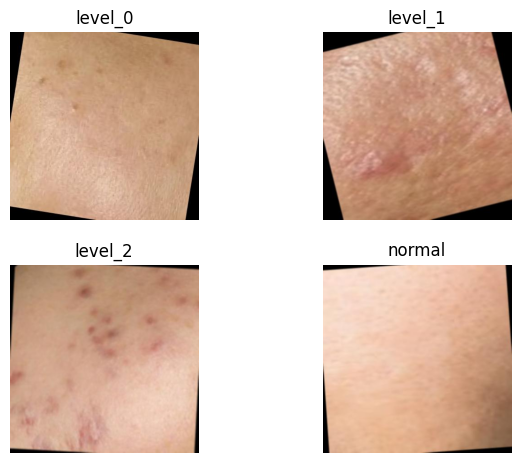

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

np.random.seed(42)

fig, ax = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
cnt = 0
for row in ax:
    for col in row:
        image_name = np.random.choice(os.listdir("acne-classification-3/train/" + labels[cnt]))
        im = Image.open("acne-classification-3/train/{}/{}".format(labels[cnt],image_name))
        col.imshow(im)
        col.set_title(labels[cnt])
        col.axis('off')
        cnt += 1
plt.show()

Alright, they look good with a wide array of images!

In [ ]:
from fastai.vision import *
from fastai.metrics import accuracy

In [ ]:
pip install fastai==1.0.61

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=44a79606208b2e7b9e0d972f4e670adf3d2d4771cc4e971f69a8b39d5f5edbd9
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.13
    Uninstalling fastai-2.7.13:
      Successfully uninstalled fastai-2.7.13


In [ ]:
path = "./acne-classification-3/"
# path = "./acne-classification-1/train/"
size = 224
bs = 64

In [ ]:
data = ImageDataBunch.from_folder(path,
                                  valid_pct=0.2, size=size, bs=bs)

In [ ]:
# data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True),
 #                                 valid_pct=0.2, size=size, bs=bs)

In [ ]:
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (1213 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
level_0,level_0,level_0,level_0,level_0
Path: acne-classification-3;

Valid: LabelList (303 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
level_1,normal,normal,normal,level_2
Path: acne-classification-3;

Test: None

In [ ]:
learner = cnn_learner(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph) #resnet18 or 34

Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 122MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


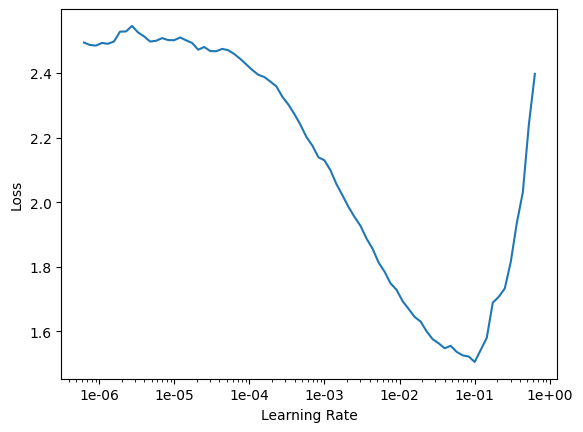

In [ ]:
learner.lr_find()
learner.recorder.plot()

### First fit and evaluation
Now let's fit our model for 8 epochs, with a learning rate between 0.001 and 0.01

epoch,train_loss,valid_loss,accuracy,time
0,1.175117,1.376228,0.762376,04:27
1,0.906273,1.111995,0.765677,04:26
2,0.787405,2.196439,0.772277,04:26
3,0.870941,2.444698,0.722772,04:26
4,0.857317,2.237791,0.759076,04:26
5,0.861588,1.213685,0.861386,04:26
6,0.795854,1.579052,0.848185,04:26
7,0.738627,2.688334,0.778878,04:23
8,0.726156,1.094316,0.825082,04:25
9,0.558480,0.546378,0.891089,04:27


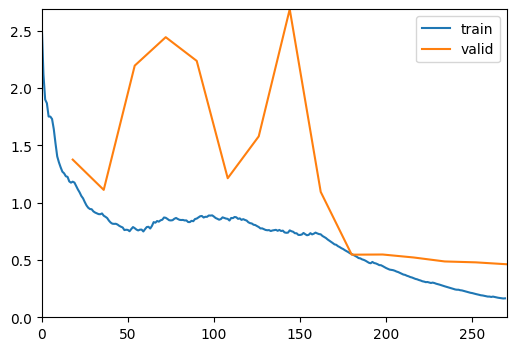

In [ ]:
learner.fit_one_cycle(15, max_lr=slice(1e-3, 1e-1))

In [ ]:
from fastai.callbacks import *
save_best_model = SaveModelCallback(learner, name='best_resnet')

epoch,train_loss,valid_loss,accuracy,time
0,0.076736,0.463794,0.920792,04:16


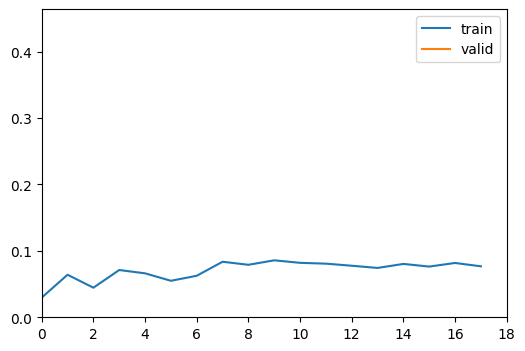

Better model found at epoch 0 with valid_loss value: 0.4637935161590576.


In [ ]:
defaults.device = torch.device('cuda') # makes sure the gpu is used
learner.fit_one_cycle(1, callbacks=save_best_model)

In [ ]:
learner.load('best_resnet')

Learner(data=ImageDataBunch;

Train: LabelList (1213 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
level_0,level_0,level_0,level_0,level_0
Path: acne-classification-3;

Valid: LabelList (303 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
level_1,normal,normal,normal,level_2
Path: acne-classification-3;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05,

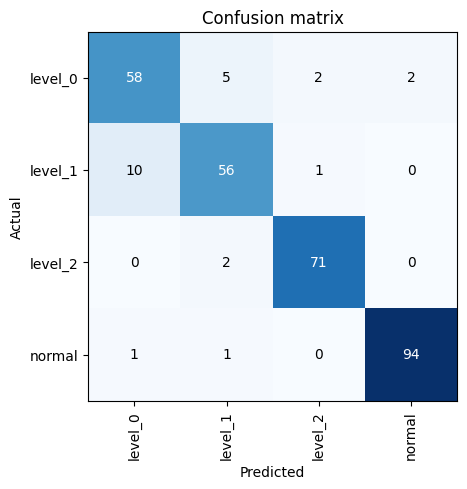

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

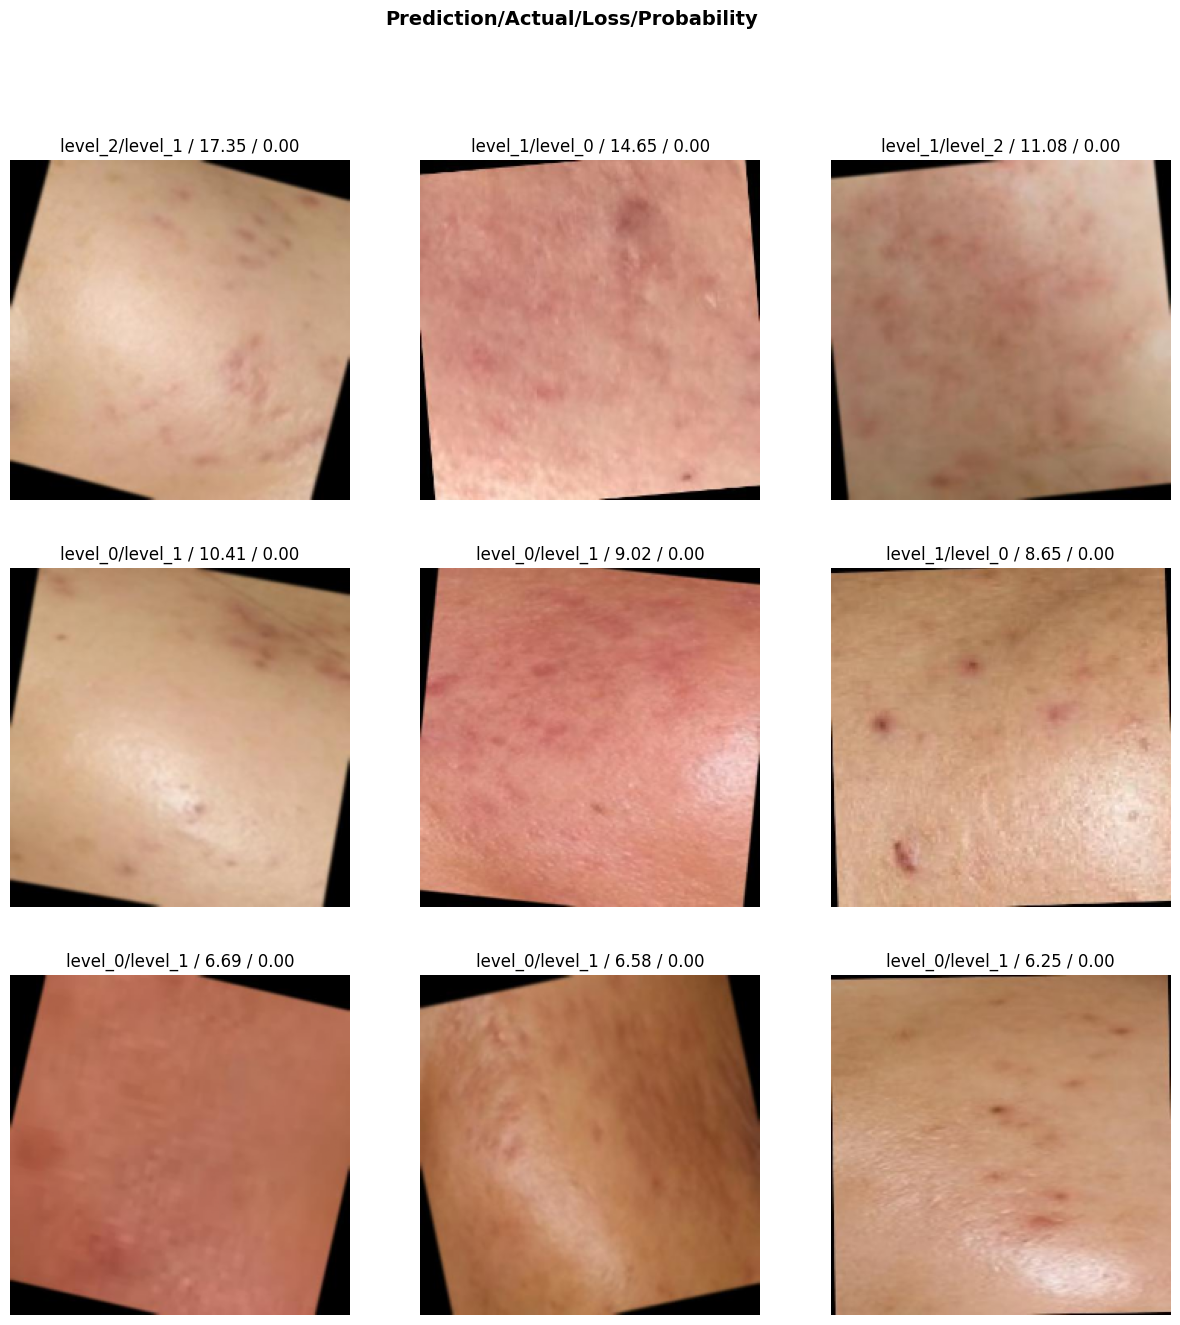

In [ ]:
interp.plot_top_losses(9, figsize=(15,15))

In [ ]:
#model is automatically saved with the "save_best_model" callback
%ls /content/acne-classification-1/models/best_resnet.pth

ls: cannot access '/content/acne-classification-1/models/best_resnet.pth': No such file or directory


In [ ]:
import torchvision.transforms as T

image=PIL.Image.open("/content/acne-classification-3/test/normal/qwe3_jpg.rf.61239d300d5b6bfc4c48cbd5021f9470.jpg")
img_tensor = T.ToTensor()(image)
img_fastai = Image(img_tensor)
# img = open_image(img_fastai)
output = learner.predict(img_fastai)
print(output)
print(output[2])
classIdx = np.argmax(output[2])
print(data.classes[classIdx])

(Category tensor(3), tensor(3), tensor([8.4723e-10, 3.4329e-09, 7.0374e-14, 1.0000e+00]))
tensor([8.4723e-10, 3.4329e-09, 7.0374e-14, 1.0000e+00])
normal


In [ ]:
data.classes

['level_0', 'level_1', 'level_2', 'normal']

Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


Baseline Model Accuracy: 92.08%
Ensemble Model Accuracy: 90.43%


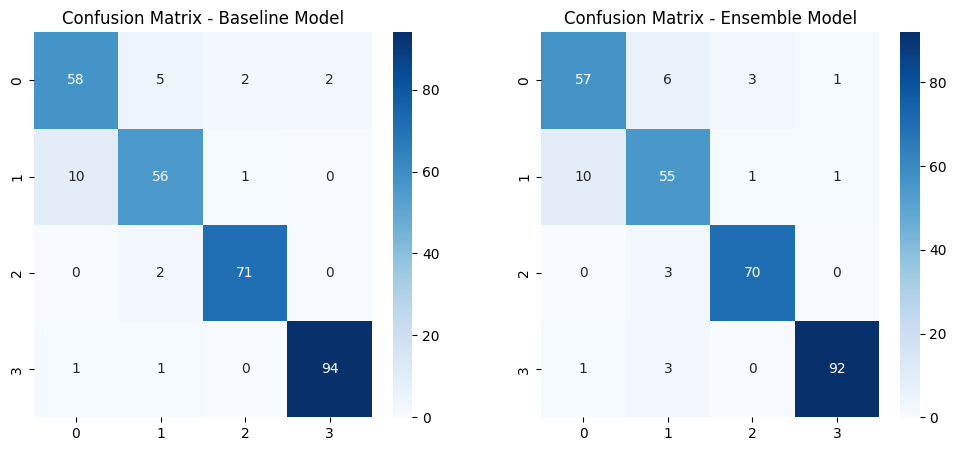

Classification Report - Baseline Model:
               precision    recall  f1-score   support

     level_0       0.84      0.87      0.85        67
     level_1       0.88      0.84      0.85        67
     level_2       0.96      0.97      0.97        73
      normal       0.98      0.98      0.98        96

    accuracy                           0.92       303
   macro avg       0.91      0.91      0.91       303
weighted avg       0.92      0.92      0.92       303


Classification Report - Ensemble Model:
               precision    recall  f1-score   support

     level_0       0.84      0.85      0.84        67
     level_1       0.82      0.82      0.82        67
     level_2       0.95      0.96      0.95        73
      normal       0.98      0.96      0.97        96

    accuracy                           0.90       303
   macro avg       0.90      0.90      0.90       303
weighted avg       0.90      0.90      0.90       303



In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import VotingClassifier

# Fungsi untuk menghitung dan menampilkan metrik evaluasi
def evaluate_model(learner, valid_dl):
    y_true = []
    y_pred = []

    for xb, yb in valid_dl:
        pred = learner.model(xb)
        y_true.extend(list(yb.numpy()))
        y_pred.extend(list(torch.argmax(pred, dim=1).numpy()))

    accuracy = accuracy_score(y_true, y_pred)
    confusion_mat = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, target_names=data.classes)

    return accuracy, confusion_mat, class_report

# Evaluasi model awal
accuracy_baseline, confusion_baseline, class_report_baseline = evaluate_model(learner, data.valid_dl)

# Membuat Ensemble Learning (contoh menggunakan VotingClassifier)
ensemble_learner = cnn_learner(data, models.resnet18, metrics=[accuracy])
ensemble_learner.load('best_resnet')  # Load model terbaik

# Membuat model ensemble
ensemble_model = VotingClassifier(estimators=[('resnet', learner.model), ('ensemble_resnet', ensemble_learner.model)],
                                  voting='soft')  # Anda dapat menyesuaikan estimators sesuai dengan model yang Anda miliki

# Evaluasi model ensemble
accuracy_ensemble, confusion_ensemble, class_report_ensemble = evaluate_model(ensemble_learner, data.valid_dl)

# Menampilkan metrik evaluasi
print("Baseline Model Accuracy: {:.2%}".format(accuracy_baseline))
print("Ensemble Model Accuracy: {:.2%}".format(accuracy_ensemble))

# Menampilkan tabel atau grafik perbandingan metrik evaluasi
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_baseline, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title('Confusion Matrix - Baseline Model')

sns.heatmap(confusion_ensemble, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title('Confusion Matrix - Ensemble Model')

plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report - Baseline Model:\n", class_report_baseline)
print("\nClassification Report - Ensemble Model:\n", class_report_ensemble)
